# Madgwick filter

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ahrs import filters
from test_data.import_data import get_data, get_gt

sample_rate = 1000

madgwick = filters.Madgwick(frequency=sample_rate, frame='ENU')
initial_pos_estimator = filters.Tilt()

In [2]:
[acc, gyro, mag] = get_data()

estimations = np.empty((len(acc), 4))
estimations[0] = initial_pos_estimator.estimate(acc[0], mag[0])

for i in range(1, len(acc)):
    estimations[i] = madgwick.updateMARG(q=estimations[i-1], acc=acc[i], gyr=gyro[i], mag=mag[i])


In [3]:
def clamp_to_360(x):
    x = np.mod(x, 360)
    return x

In [4]:
from utils import quaternion_to_euler
phi_hat, theta_hat, psi_hat = quaternion_to_euler(estimations)

phi_hat = clamp_to_360(phi_hat)
theta_hat = clamp_to_360(theta_hat)
psi_hat = clamp_to_360(psi_hat) # todo: mind the + 90 here

In [5]:
phi, theta, psi = quaternion_to_euler(get_gt())

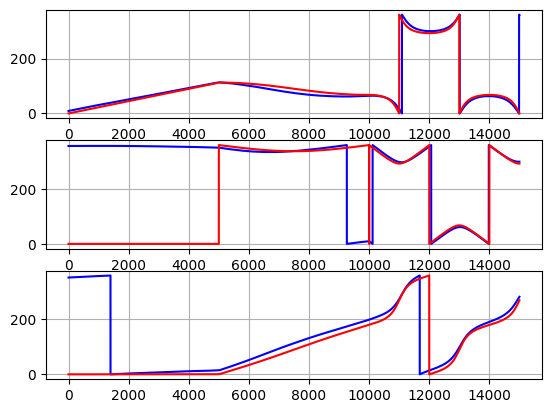

In [6]:
%matplotlib inline

plt.subplot(3, 1, 1)
plt.plot(phi_hat, 'b')
plt.plot(phi, 'r')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(theta_hat, 'b')
plt.plot(theta, 'r')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(psi_hat, 'b')
plt.plot(psi, 'r')
plt.grid()

plt.show()